In [80]:
import plumed
import matplotlib.pyplot as plt
import os
import MDAnalysis
import mdtraj as md 
import numpy as np
import math
import pyemma
from os import getcwd as wd
from os import chdir as cd
import pandas as pd
from IPython.display import Image
import seaborn as sns

In [85]:
def extract_files(dr,root,n,end):
    l=[]
    if dr == None:
        dr = os.getcwd()
    if end == None:
        targets = [dr+"/"+str(root)+"{}".format(str(j)) for j in range(n)]
    else:
        targets = [dr+"/"+str(root)+"{}".format(str(j))+end for j in range(n)]
        
    for i in targets:
            for k in [dr+"/"+f for f in os.listdir(dr) if os.path.isfile(os.path.join(dr,f))]:
                if i == k: l.append(i)
    return l   



In [108]:
def plotmed(cv):
   
    df = [plumed.read_as_pandas(i) for i in cv]
    arr = [i.to_numpy() for i in df]
    cat = np.concatenate(arr,axis=0)
    cat[~np.isfinite(cat)] = 0
    title = df[0].columns.tolist()
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    pyemma.plots.plot_free_energy(*cat[:,1:3].T,ax=ax)
    ax.set_xlabel("{}".format(title[1]))
    ax.set_ylabel("{}".format(title[2]))
    
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    pyemma.plots.plot_free_energy(*cat[:,3:5].T,ax=ax)
    ax.set_xlabel("{}".format(title[3]))
    ax.set_ylabel("{}".format(title[4]))
   
    for i,t in enumerate(title):
        plt.figure()
        for j in df:
            j.iloc[:,i].plot(xlabel="Time",ylabel=t)
           
    fig,ax=plt.subplots(len(title),1, figsize=(8,2.5*len(title)))
    for i,(t,ax) in enumerate(zip(title,ax.flat)):
        sns.kdeplot(cat[:,i],ax=ax)
        ax.set_xlabel(f"{t}")
        plt.tight_layout()
   
    return df,arr,cat

In [5]:
!gmx

                         :-) GROMACS - gmx, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk H

In [ ]:
wd = os.getcwd() + "/"

In [ ]:
os.chdir(wd+"aladipeptide")

In [ ]:
#we begin with a run through of the PCAVARS and PCV tutorial from plumed
# https://www.plumed.org/doc-v2.6/user-doc/html/marvel-2.html

In [6]:
#load alanine dipeptide transition path trajectory
traj = md.load("transformation.pdb")

In [7]:
traj.topology.to_dataframe()

(    serial name element  resSeq resName  chainID segmentID
 0        1   CL       C       1     ALA        0          
 1        5  CLP       C       1     ALA        0          
 2        6   OL       O       1     ALA        0          
 3        7   NL       N       1     ALA        0          
 4        8   HL       H       1     ALA        0          
 5        9   CA       C       1     ALA        0          
 6       10   HA       H       1     ALA        0          
 7       11   CB       C       1     ALA        0          
 8       15  CRP       C       1     ALA        0          
 9       16   OR       O       1     ALA        0          
 10      17   NR       N       1     ALA        0          
 11      18   HR       H       1     ALA        0          
 12      19   CR       C       1     ALA        0          ,
 array([[5., 7., 0., 0.],
        [5., 6., 0., 0.]]))

In [8]:
#compute dihedrals
dihedrals = md.compute_dihedrals(traj,np.array([[2,4,6,9],[4,6,9,11]]))

Text(0.5, 1.0, 'Progression of $\\phi$ and $\\psi$ over Transition Path')

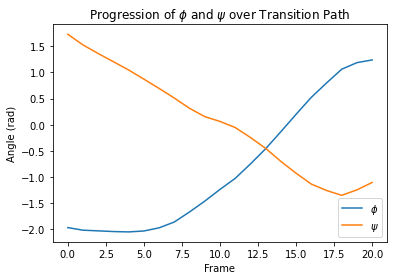

In [9]:
plt.plot(np.arange(len(dihedrals)),dihedrals[:,0],label="$\phi$")
plt.plot(np.arange(len(dihedrals)),dihedrals[:,1],label="$\psi$")
plt.ylabel("Angle (rad)")
plt.xlabel("Frame")
plt.legend()
plt.title("Progression of $\phi$ and $\psi$ over Transition Path")

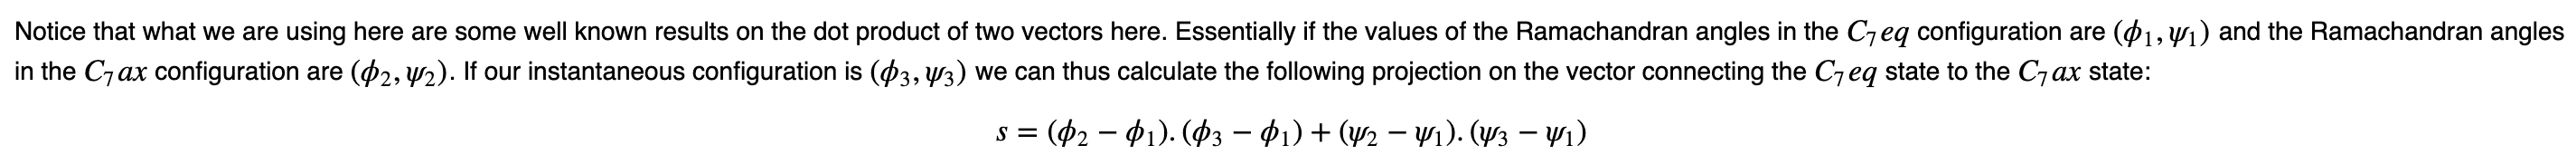

In [42]:
"""Now we construct a CV by calculating the two dihedrals, combining them into a 2,1 vector and dotting them
with a vector pointing from the first frame of the guess path to the last frame of the guess in dihedral space.
This is done for each frame in the guess path"""

Image("/home/t/Downloads/Screen Shot 2022-03-10 at 6.07.48 PM.png")

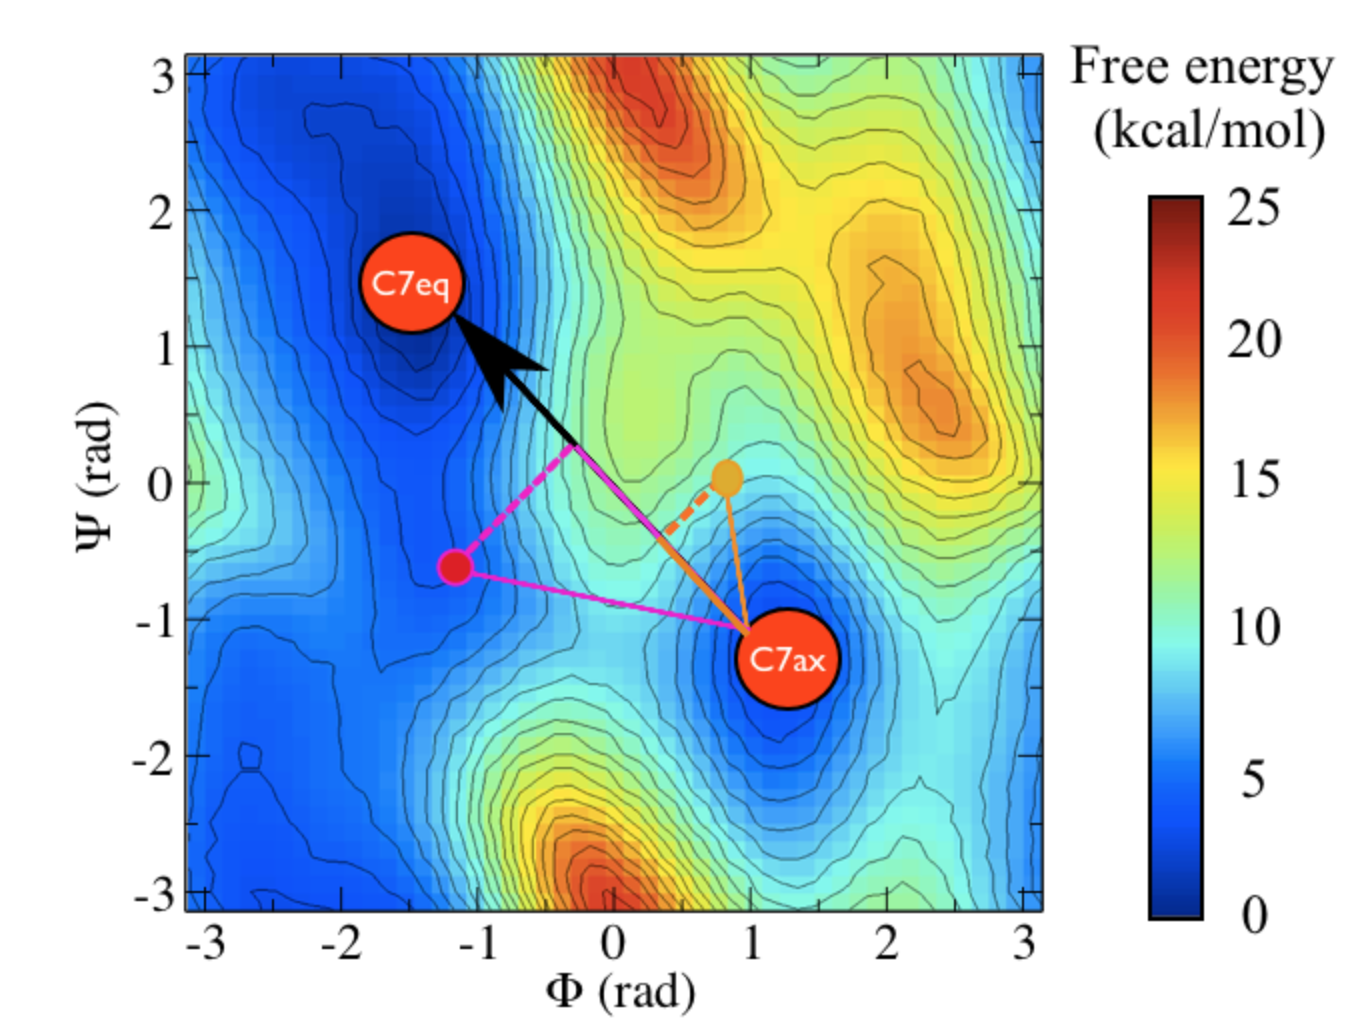

In [43]:
Image(filename="/home/t/Downloads/Screen Shot 2022-03-10 at 5.23.00 PM.png")

In [45]:
#The CV is the dot product at each frame
!plumed driver --plumed plumed_1.dat --mf_pdb transformation.pdb
dihedral_dot = plumed.read_as_pandas("colvar_dihedral_dot_connection")


DRIVER: Found molfile format trajectory pdb with name transformation.pdb
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/t/anaconda3/envs/plumed/lib/plumed
PLUMED: For installed feature, see /home/t/anaconda3/envs/plumed/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 13
PLUMED: File suffix: 
PLUMED: FILE: plumed_1.dat
PLUMED: Action TORSION
PLUMED:   with label t1
PLUMED:   between atoms 2 4 6 9
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:   with label t2
PLUMED:   between atoms 4 6 9 11
PLUMED:   using periodic boundary conditions
PLUMED: Action COMBINE
PLUMED:   with label tc
PL

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


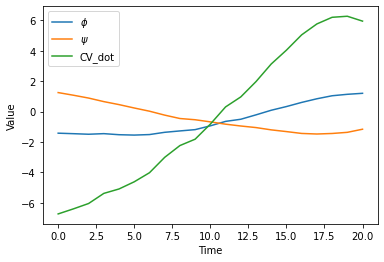

In [46]:
#Here, we plot the newly generated CV along with the two dihedrals
title_dihedral_dot = ["$\phi$","$\psi$","CV_dot"]
for i,title in enumerate(title_dihedral_dot):
    dihedral_dot.iloc[:,i+1].plot(xlabel="Time",ylabel="Value",label=title)
plt.legend()

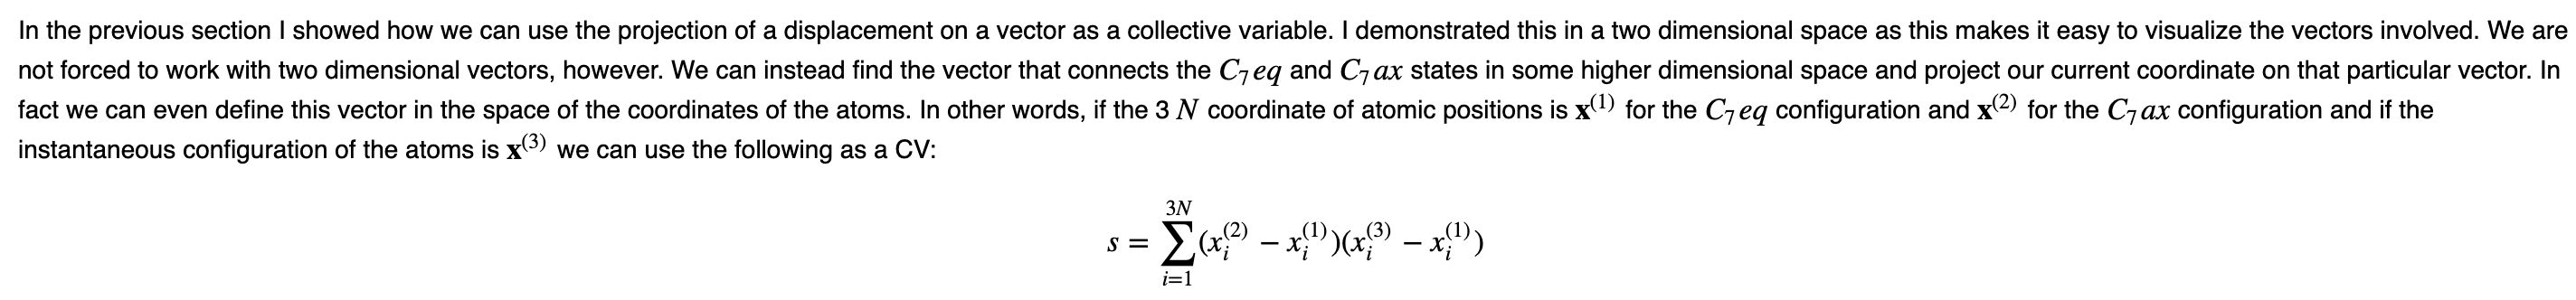

In [49]:
"""We now use an identical formulation as the previous CV but in the space of all atoms, i.e RMSD"""

Image(filename="/home/t/Downloads/Screen Shot 2022-03-10 at 9.11.25 PM.png")

In [56]:
!plumed driver --plumed plumed_2.dat --mf_pdb transformation.pdb


DRIVER: Found molfile format trajectory pdb with name transformation.pdb
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/t/anaconda3/envs/plumed/lib/plumed
PLUMED: For installed feature, see /home/t/anaconda3/envs/plumed/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 13
PLUMED: File suffix: 
PLUMED: FILE: plumed_2.dat
PLUMED: Action PCAVARS
PLUMED:   with label p
PLUMED:   found 1 eigenvectors in file pca-reference.pdb 
PLUMED:   found 13 atoms in input 
PLUMED:   with indices : 
PLUMED: 1 2 3 4 5 6 7 8 9 10 11 12 13 
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.eig-

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


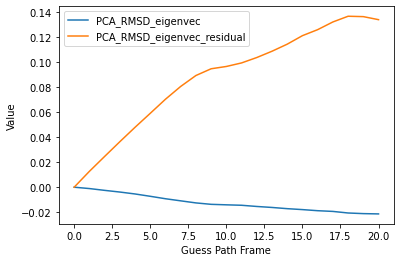

In [73]:
#here we visualize how the calculation of the RMSD - PCAVAR over the guess path
"""this is a fairly sucessful CV as it is almost monotonically increasing wrt the progression of the guess path"""
pcavar_RMSD = plumed.read_as_pandas("colvar_RMSD_PCA")
title_dihedral_dot = ["PCA_RMSD_eigenvec","PCA_RMSD_eigenvec_residual"]
for i,title in enumerate(title_dihedral_dot):
    pcavar_RMSD.iloc[:,i+1].plot(xlabel="Guess Path Frame",ylabel="Value",label=title)
plt.legend()

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PL

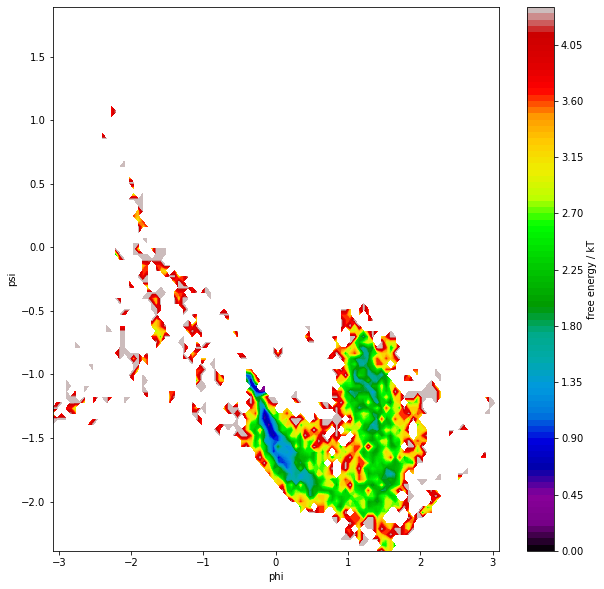

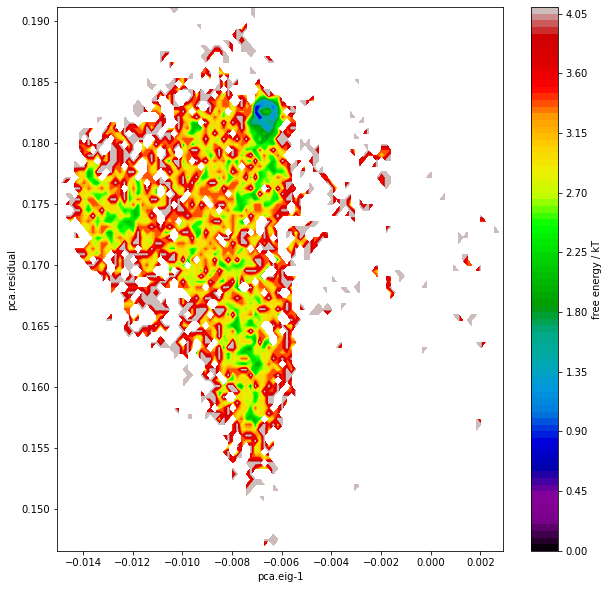

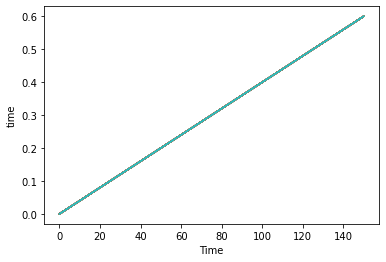

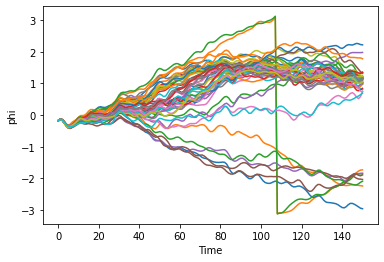

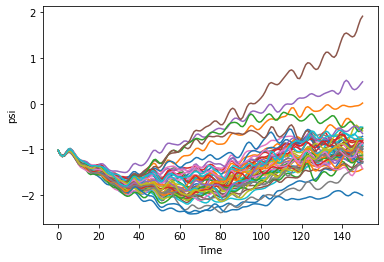

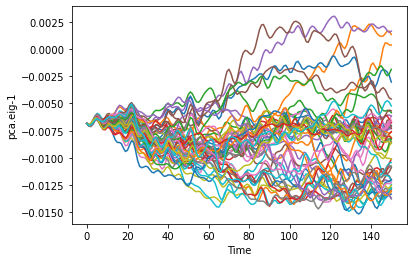

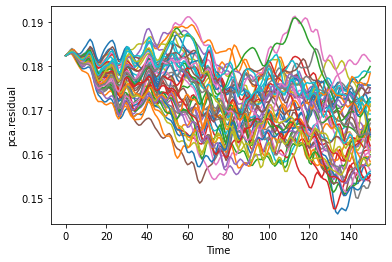

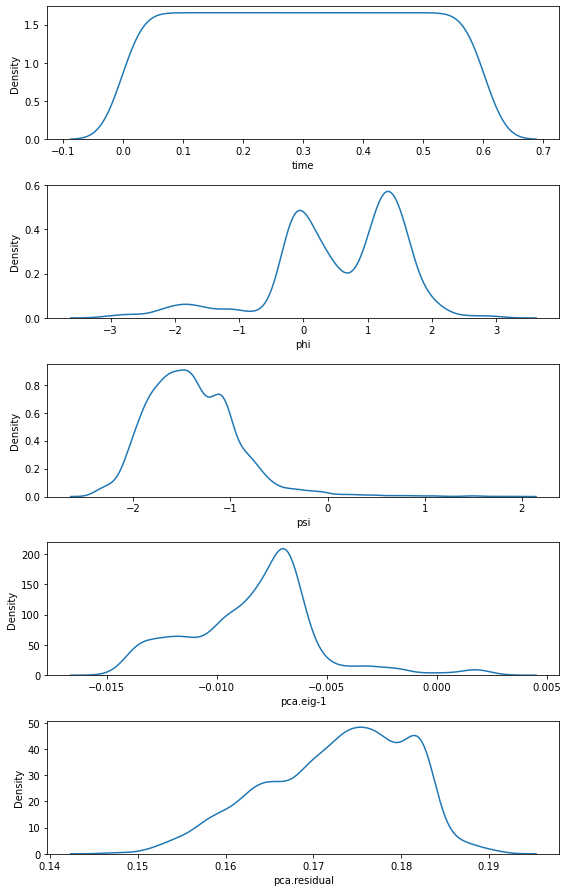

In [123]:
"""now we run 50 unbiased simulations begining at the apparent transition state in the conformational transformation
of alanine dipeptide,  we hope to see 50% of the trajectories going forward and 50% backward"""
#pca.residual is the resultant CV from the RMSD dot product scheme
#we see from the plot of phi against time that is variable is not effective at capturing the transition state
PCA_rmsd_files = extract_files("/home/t/chem101/pcv/marvel-2/PCA-isocommittor","colvar_",51,None)
d,ar,cat = plotmed(PCA_rmsd_files)

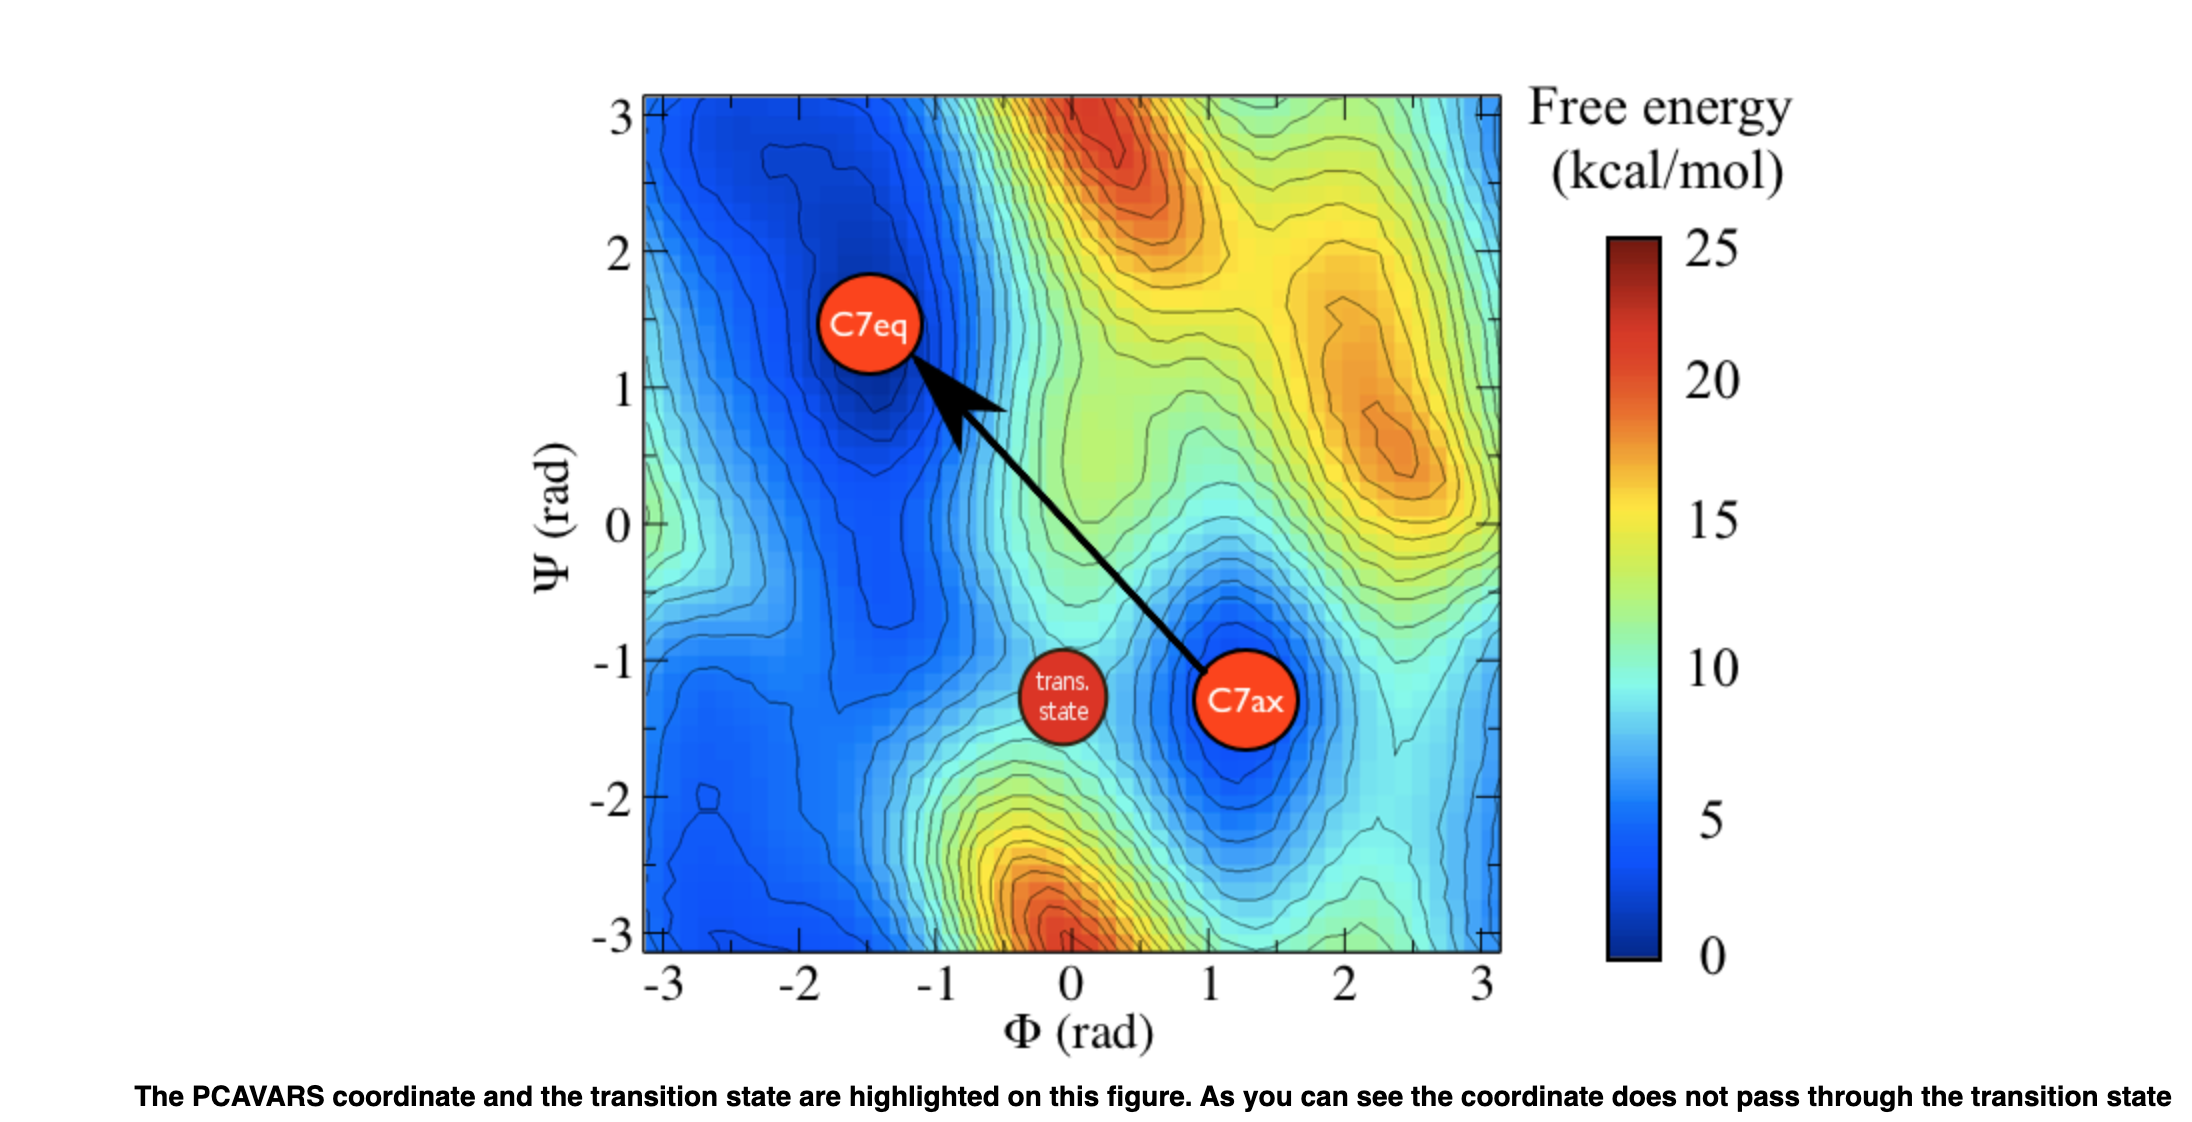

In [87]:
"""We can understand why the PCAVAR from RMSD is not effective by marking the transition state or
free energy barrier in dihedral space along with the vector we're projectin onto"""
Image(filename = "/home/t/Downloads/Screen Shot 2022-03-14 at 12.02.54 PM.png")

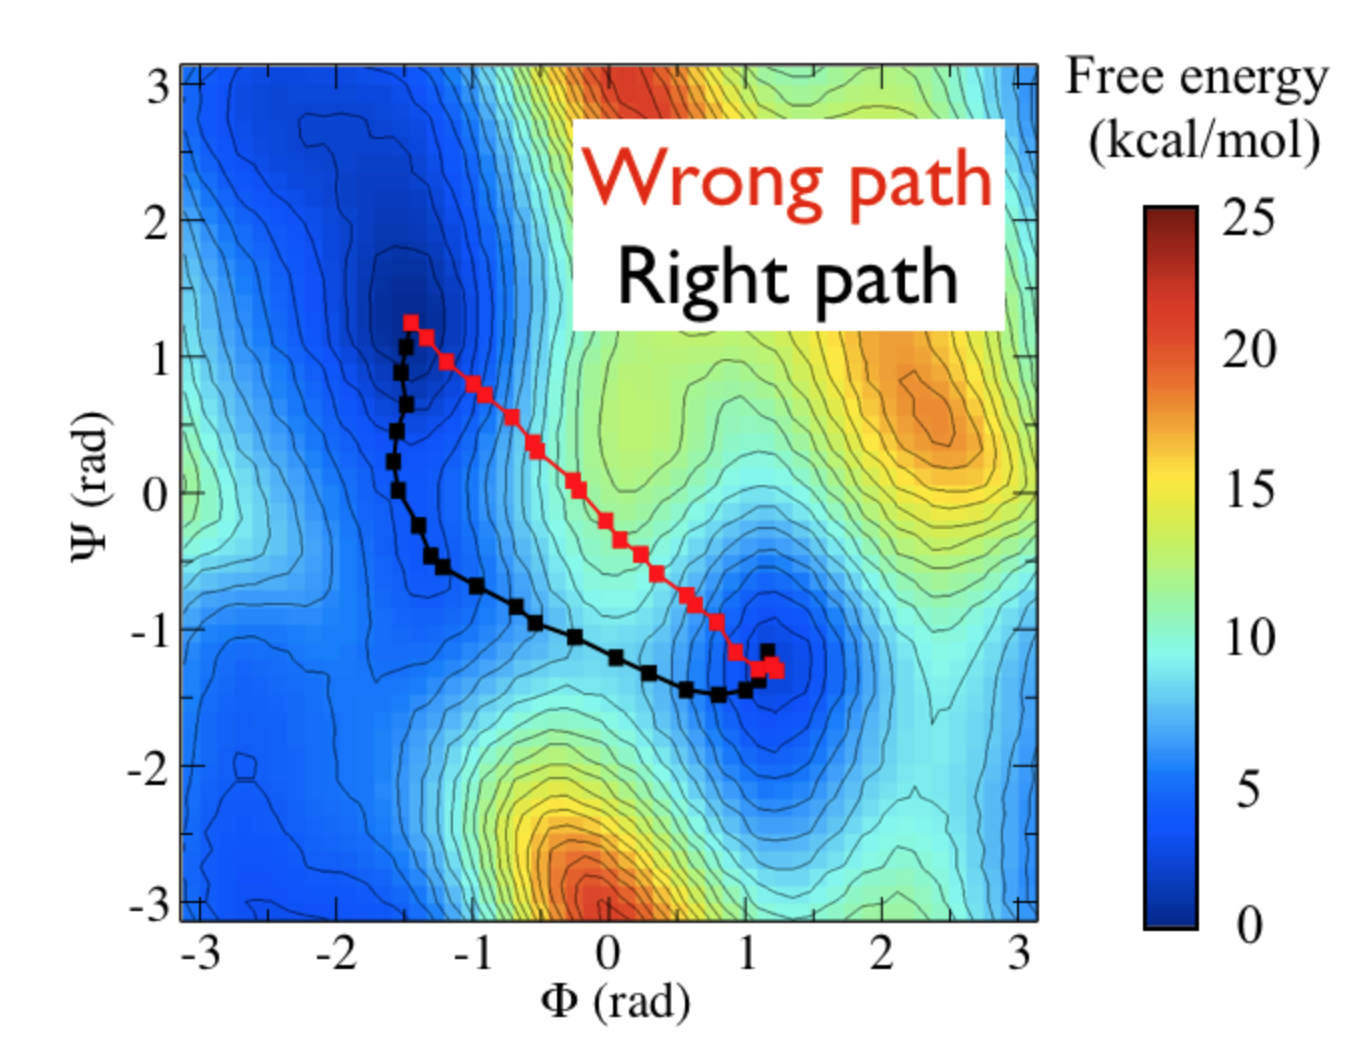

In [88]:
"""Rather than projecting onto a straight vector that passes through regions of very high free energy,
we want to project our data onto a path which takes the lowest lowest free energy route between the two states"""

"""We can define this non-linear path by constucting a guess using frames that respresent the points on the black
path"""

Image(filename="/home/t/Downloads/Screen Shot 2022-03-14 at 12.07.58 PM.png")

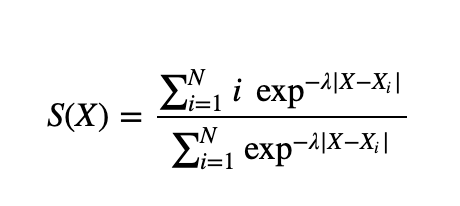

In [93]:
"""We can construct PCVs that describe where are our system is relative to the aforementioned, correct path"""
Image("/home/t/Downloads/Screen Shot 2022-03-14 at 12.17.31 PM.png")


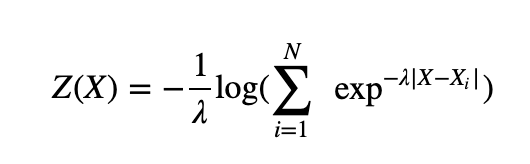

In [94]:
Image("/home/t/Downloads/Screen Shot 2022-03-14 at 12.17.53 PM.png")

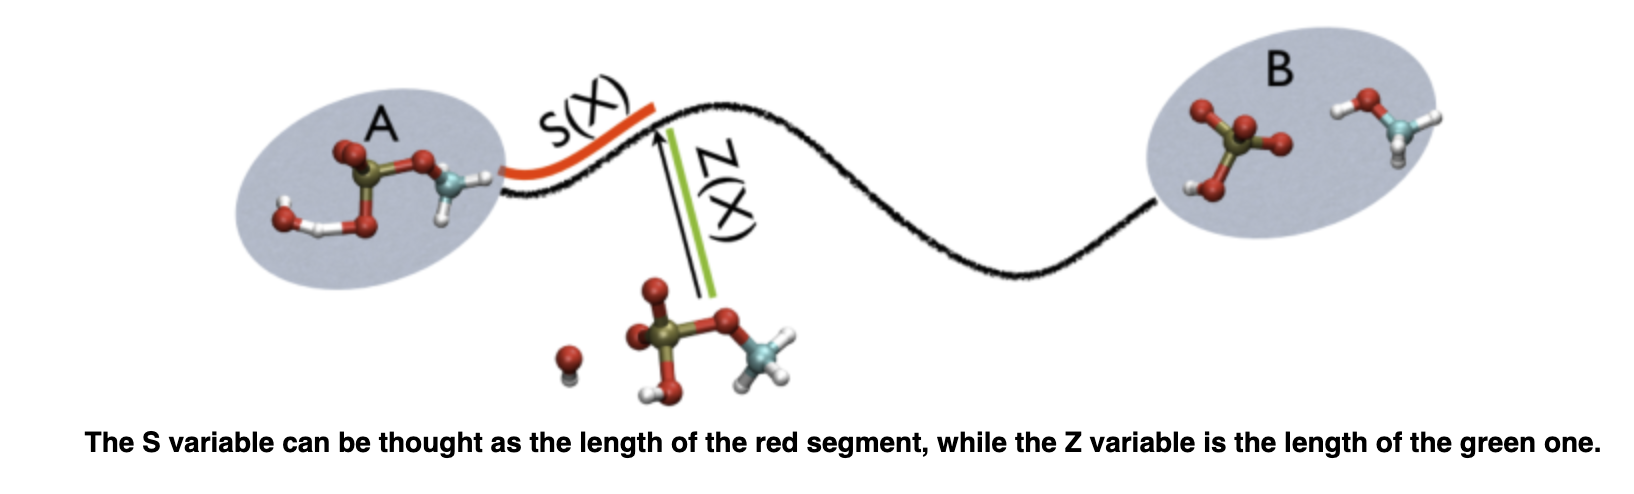

In [92]:
Image("/home/t/Downloads/Screen Shot 2022-03-14 at 12.17.45 PM.png")

In [95]:
!pwd

/home/t/chem101/pcv/marvel-2


In [97]:
%%bash
#lets calculate the path CVs s and z over the course of our guess path
cd ./PATH-isocommittor

plumed driver --mf_pdb transformation.pdb


DRIVER: Found molfile format trajectory pdb with name transformation.pdb
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/t/anaconda3/envs/plumed/lib/plumed
PLUMED: For installed feature, see /home/t/anaconda3/envs/plumed/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 13
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action PATH
PLUMED:   with label path
PLUMED:   found 21 configurations in file path-reference.pdb
PLUMED:   found 13 atoms in input 
PLUMED:   with indices : 
PLUMED: 1 2 3 4 5 6 7 8 9 10 11 12 13 
PLUMED:   added component to this action:  path.zpath 
PLUMED:   value path.zpath is obtained

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


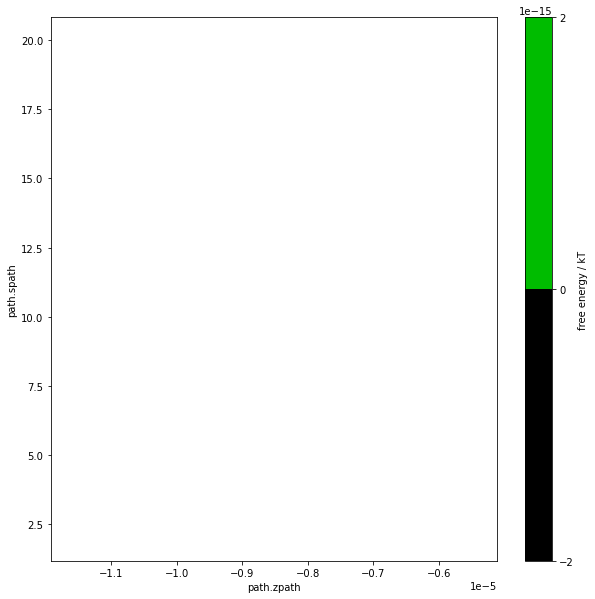

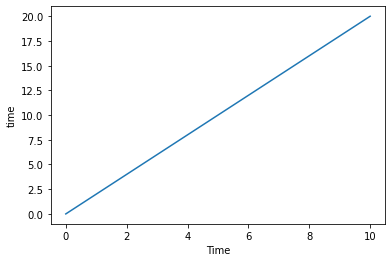

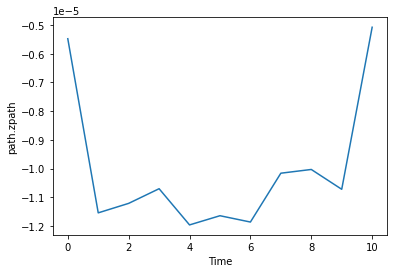

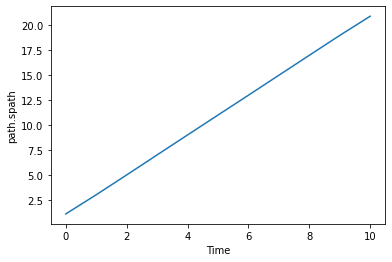

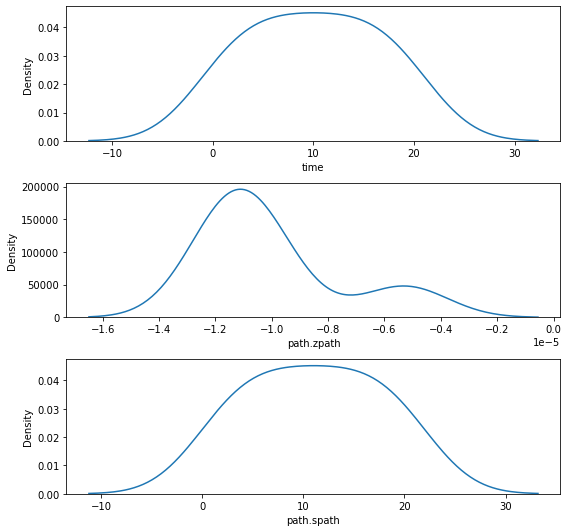

In [100]:
"""We see that the CV s is a perfectly straight line (as is should be, by definition) and the CV z is 
very close to zero (note the path.zpath axis scaling) as it should be, by definition
from this, we know that the CV's are being calculated correctly"""
_,_,_=plotmed(["/home/t/chem101/pcv/marvel-2/PATH-isocommittor/colvar_path_rmsd"])

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PL

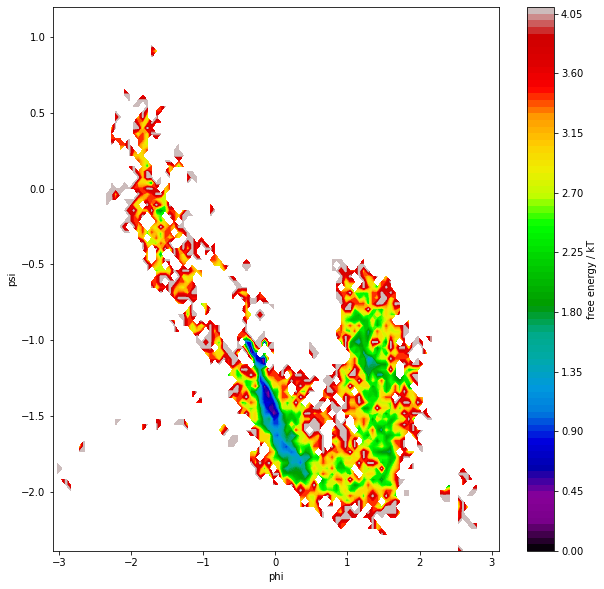

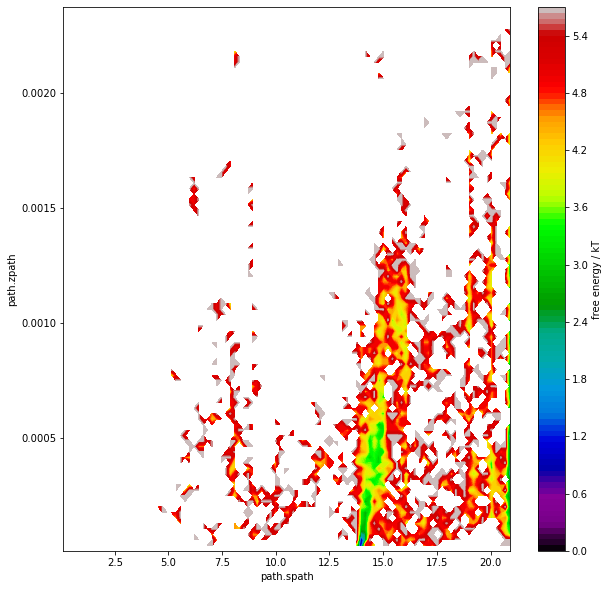

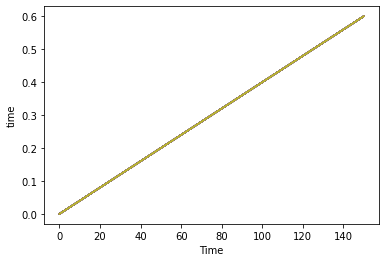

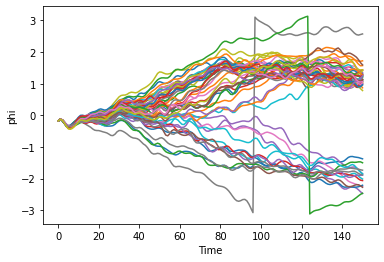

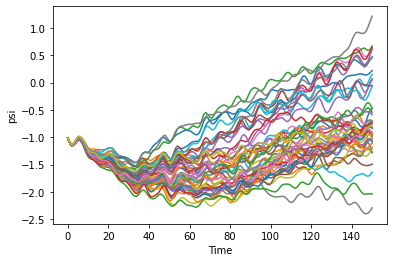

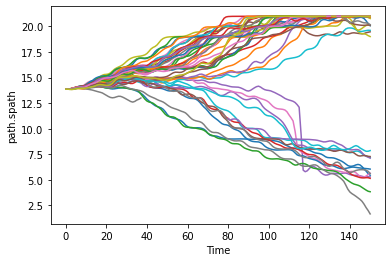

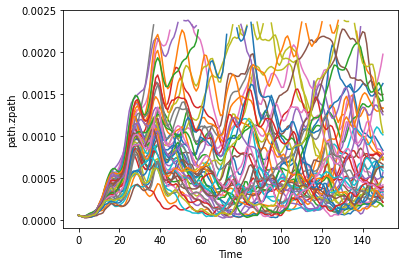

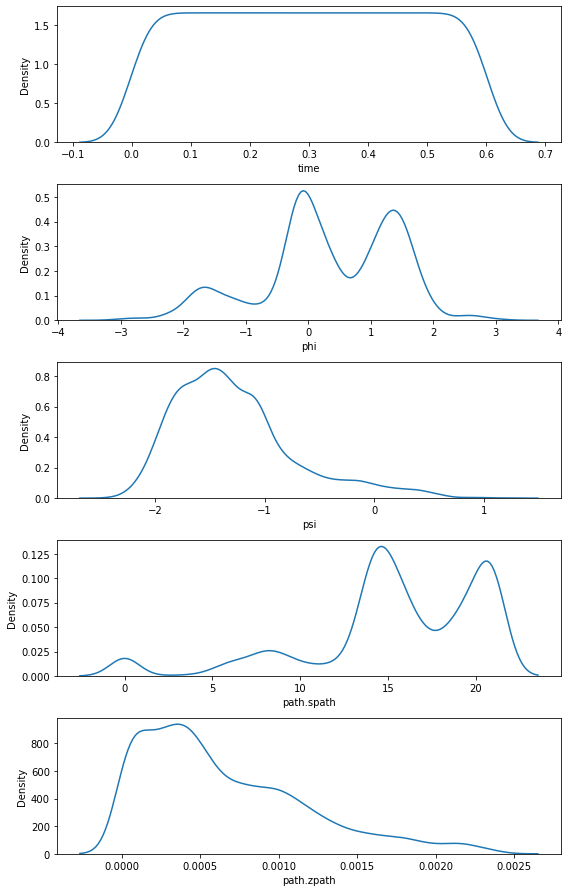

In [125]:
"""Again, we run 50 short simulations started at the transition state and calculate our CVs (s,z)"""

"""we see from the spath plot that it is able to differentiate between trajectories going to either conformation"""
rmsd_PATH_iso = extract_files("/home/t/chem101/pcv/marvel-2/PATH-isocommittor","colvar_",50,None)
_,_,_ = plotmed(rmsd_PATH_iso)

In [140]:
%%bash

#we now want to use the rmsd-based collective variables we've just defined in a metadynamics simulation
#unfortunately, even a for a small system like alanine dipeptide, we can only run this simulation for a very short 
#time if the GPUs are not being used


# export PLUMED_NUM_THREADS=1:
# mpiexec -np 8 gmx_mpi mdrun -nb gpu -ntomp 2 -pin on -gpu_id 0011

# my CV
# create directory for this exercise
cd /home/t/chem101/pcv/marvel-2/PATH-isocommittor
# create PLUMED input file


cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
#MOLINFO STRUCTURE=../../data/diala/dialaA.pdb



phi: TORSION ATOMS=5,7,9,15
psi: TORSION ATOMS=7,9,15,17
path: PATH REFERENCE=path-reference.pdb TYPE=OPTIMAL LAMBDA=15100.

metad: METAD ARG=path.spath,path.zpath ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 8
  PACE=100 HEIGHT=1.2 BIASFACTOR=8
  # Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run
  # try 1/2 or 1/3 of the estimated fluctuations
  SIGMA=.005,.0001
  # Gaussians will be written to file and also stored on grid
  FILE=HILLS GRID_MIN=0,0 GRID_MAX=25,.01
...
# Print both collective variables on COLVAR file every 10 steps
PRINT ARG=path.spath,path.zpath,phi,psi STRIDE=10 FILE=colvar_path_rmsd_meta FMT=%12.8f
EOF


# run simulation
gmx mdrun -s topol.tpr -nsteps 100 -plumed plumed.dat

                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/t/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


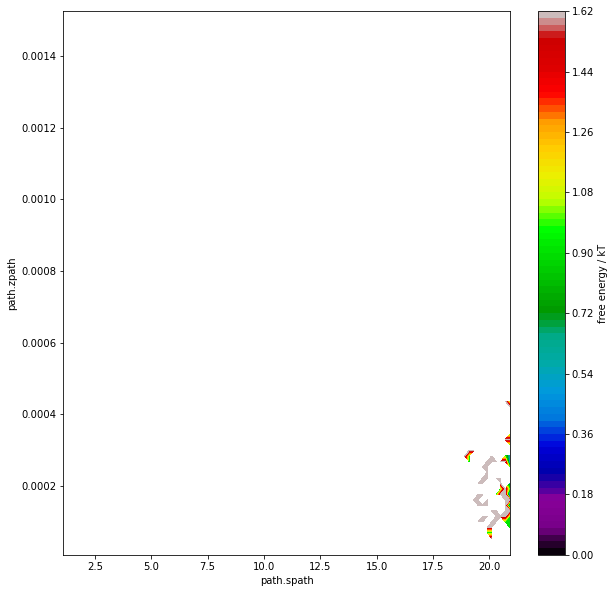

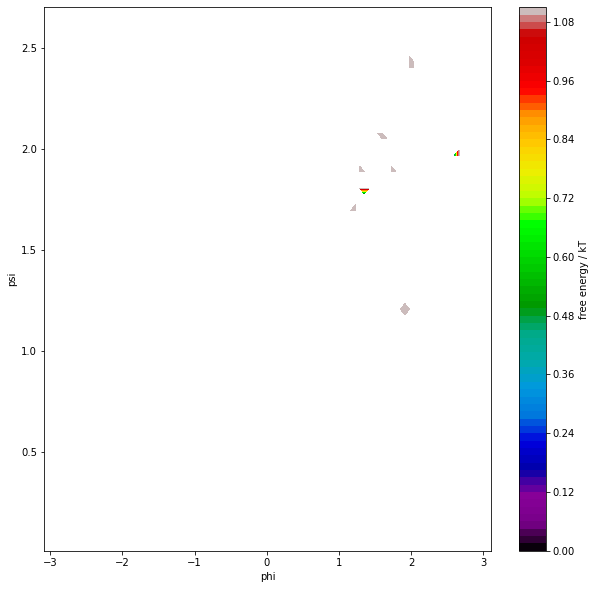

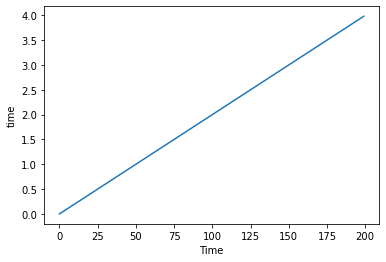

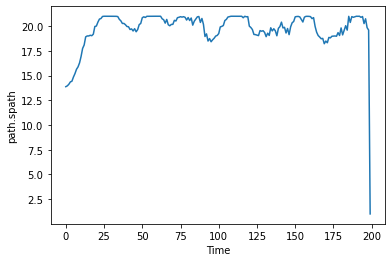

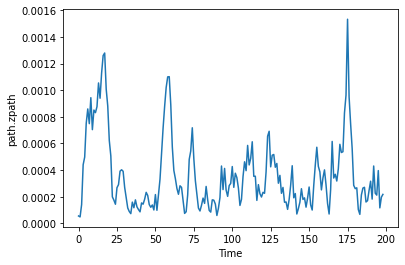

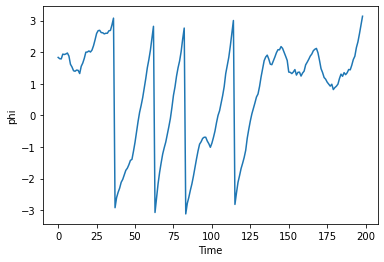

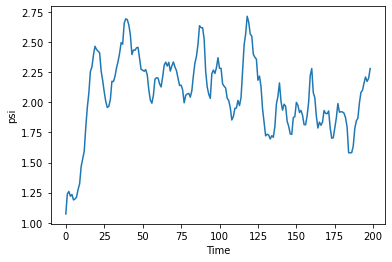

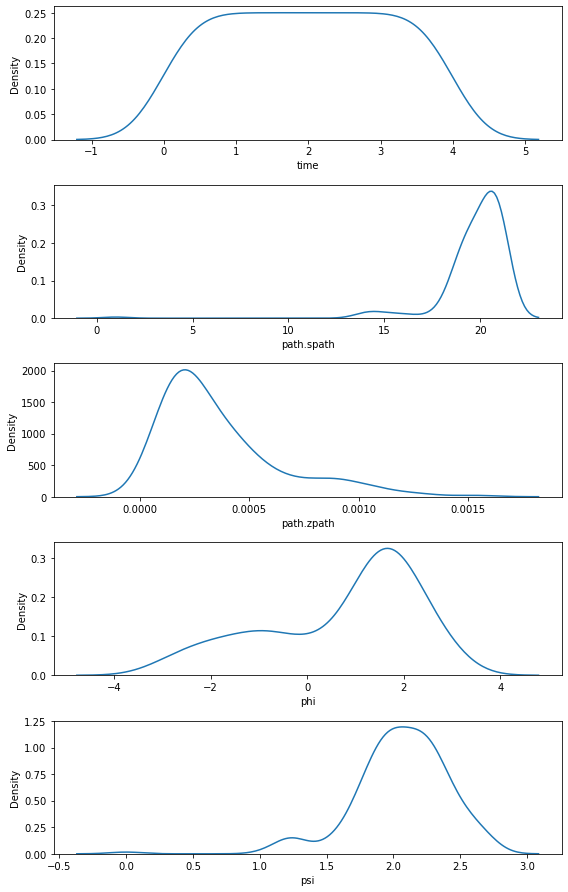

In [127]:
##extract results from metadynamics simulation - have very few frames
# couldn't simulate for long without memory errors
_,_,_=plotmed(["/home/t/chem101/pcv/marvel-2/PATH-isocommittor/bck.2.colvar_path_rmsd_meta"])